In [3]:
!pip install geoplot

     |████████████████████████████████| 1.0 MB 11.8 MB/s 
     |████████████████████████████████| 10.8 MB 46.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 41.6 MB/s 
     |████████████████████████████████| 16.7 MB 44.0 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64

In [3]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import scipy

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [4]:
indo = gpd.read_file("/content/drive/MyDrive/week9/IDN_adm1.shp")
indo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,106,IDN,Indonesia,1,Aceh,Propinsi,Autonomous Province,None,Achin|Atjeh|Nanggroe Aceh Darussalam,"MULTIPOLYGON (((97.38493 1.97713, 97.38396 1.9..."
1,106,IDN,Indonesia,2,Bali,Propinsi,Province,None,Penida|Lembongan|Ceningan|Menjangan,"MULTIPOLYGON (((115.62988 -8.77599, 115.63037 ..."
2,106,IDN,Indonesia,3,Bangka-Belitung,Propinsi,Province,None,Babel|Kepulauan Bangka Belitung,"MULTIPOLYGON (((108.06951 -3.80305, 108.06826 ..."
3,106,IDN,Indonesia,4,Banten,Propinsi,Province,None,None,"MULTIPOLYGON (((105.54861 -6.99472, 105.54889 ..."
4,106,IDN,Indonesia,5,Bengkulu,Propinsi,Province,None,Bencoolen|Benkoelen|Benkulen,"MULTIPOLYGON (((102.38627 -5.47112, 102.38682 ..."


In [5]:
covid_indo = pd.read_excel("/content/drive/MyDrive/week9/dataset_covid.xlsx") 
covid_indo.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,2021-01-05 00:00:00,ID-AC,Aceh,124,2,118,4,11169,441,9727,1001,Province,Aceh,Indonesia,Asia,Sumatera,UTC+07:00,Daerah Khusus,18,5.0,289,NaN,6497.0,57956,5247257,90.54,9691052174,4.225615e+09,23.63,2128.54,0.38,84.04,8.40,3.95%,87.09%,1.59,2.00
1,2021-01-05 00:00:00,ID-BA,Bali,142,10,165,-33,44813,1346,42135,1332,Province,Bali,Indonesia,Asia,Nusa Tenggara,UTC+08:00,NaN,8,1.0,57,80.0,636.0,5780,4216171,729.43,1151317136,-8.369472e+09,33.68,10628.84,2.37,319.25,31.92,3.00%,94.02%,1.04,1.67
2,2021-01-05 00:00:00,ID-BT,Banten,53,0,28,25,47396,1210,44202,1984,Province,Banten,Indonesia,Asia,Jawa,UTC+07:00,NaN,4,4.0,155,313.0,1238.0,9663,10722374,1109.64,1061090043,-6.456736e+09,4.94,4420.29,0.00,112.85,11.28,2.55%,93.26%,0.74,0.00
3,2021-01-05 00:00:00,ID-BE,Bengkulu,102,0,40,62,6884,172,5885,827,Province,Bengkulu,Indonesia,Asia,Sumatera,UTC+07:00,NaN,9,1.0,129,172.0,1341.0,19919,1999539,100.38,1023384213,-3.533584e+09,51.01,3442.79,0.00,86.02,8.60,2.50%,85.49%,2.37,1.00
4,2021-01-05 00:00:00,ID-JK,DKI Jakarta,926,15,793,118,409540,6681,395727,7132,Province,DKI Jakarta,Indonesia,Asia,Jawa,UTC+07:00,Daerah Khusus Ibu Kota,1,5.0,44,267.0,NaN,664,10846145,16334.31,1068361183,-6.204699e+09,85.38,37759.04,1.38,615.98,61.60,1.63%,96.63%,1.17,3.75


In [6]:
cv1may = covid_indo["Date"] == "01/05/2021"
cv1may.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [7]:
cvindo = indo.merge(covid_indo[cv1may], left_on="NAME_0", right_on="Location")
cvindo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Location Level,Province,Country,Continent,Island,Time Zone,Special Status,Total Regencies,Total Cities,Total Districts,Total Urban Villages,Total Rural Villages,Area (km2),Population,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths


/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


Text(0.5, 1.0, 'Sebaran Kasus Positif COVID19 di Indonesia per Tanggal 1 Mei 2021')

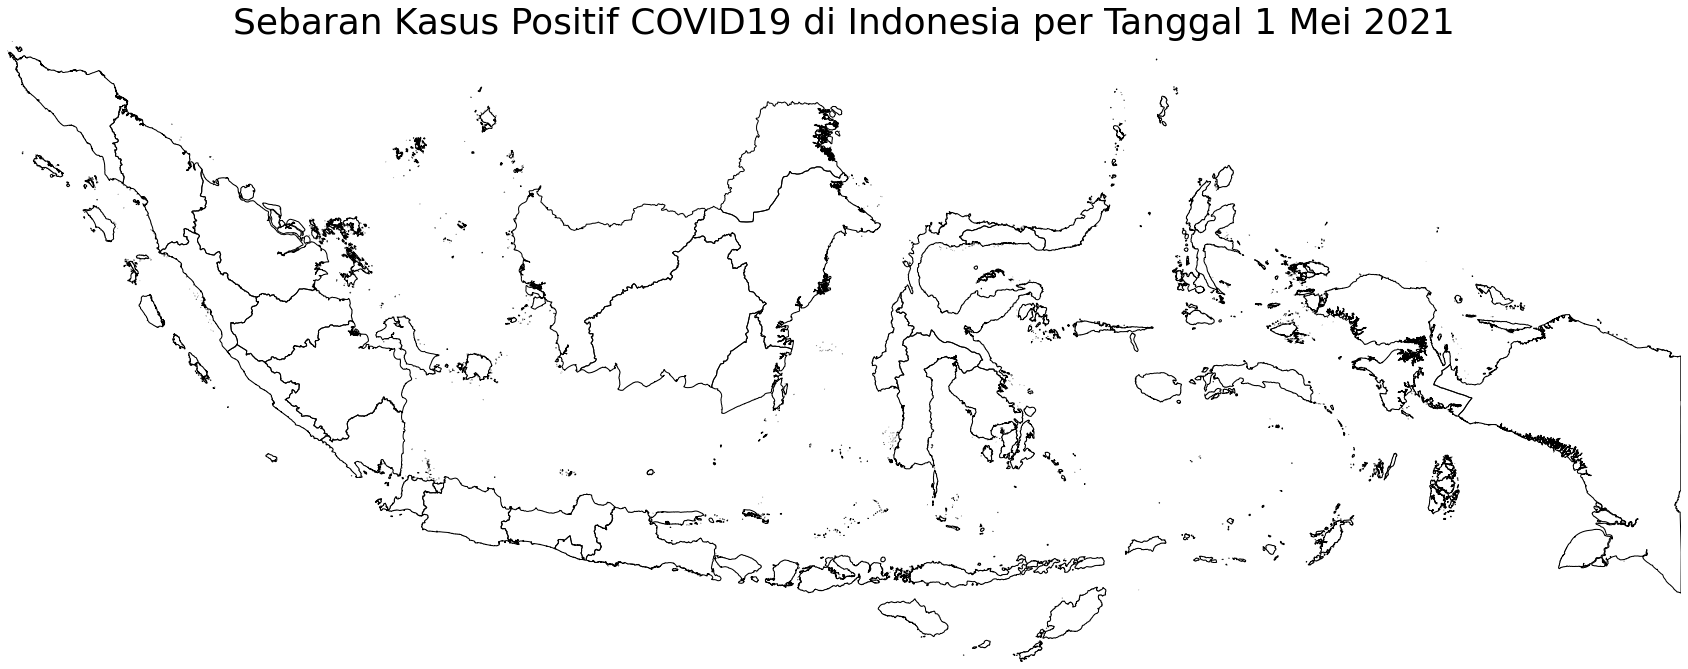

In [8]:
ax = gplt.choropleth(
    cvindo,
    hue="New Active Cases",
    edgecolor="Greens",
    linewidth=5,
    cmap="Reds",
    alpha = 1,
    figsize=(30, 30)
)

gplt.polyplot(
    indo,
    ax=ax,
    extent=indo.total_bounds,
    edgecolor="black",
    linewidth=1,
    zorder=1
)

ax.set_title(
    "Sebaran Kasus Positif COVID19 di Indonesia per Tanggal 1 Mei 2021",
    fontsize=36
)